# Importing required Libraries

In [1]:
##importing libraries
import pandas as pd
import matplotlib
import openpyxl
import xlsxwriter
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Getting data and Understanding the values

In [6]:
data = pd.read_csv(r'C:\Users\Samarth\Desktop\Credit_ist Analysis\bankloans.csv')

In [7]:
print(len(data))
data.head()

850


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


age - age of customer  <br> 
ed - education Category  <br> 
employ - years since employment  <br> 
address - No of years in same address <br> 
income: Customer Income <br> 
debtinc: Debt to income ratio <br> 
creddebt: Credit to Debt ratio <br> 
othdebt: Other debts default: Customer defaulted in the past (1= defaulted, 0=Never defaulted)


In [8]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [9]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


## Data Cleaning

In [10]:
def outliers_handling(x):
    #x = x.clip_upper(x.quantile(0.99))
    #x = x.clip_lower(x.quantile(0.01))
    x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

In [11]:
def fillna(x):
    x = x.fillna(x.mean())
    return x

In [12]:
data = data.apply(lambda x: outliers_handling(x))
data = data.apply(lambda x: fillna(x))
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12.0,176.0,9.3,10.285997,5.008608,1.0
1,27,1,10,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40,1,15,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41,1,15,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24,2,2,0.0,28.0,17.3,1.787436,3.056564,1.0


## Understanding Corelation

<AxesSubplot:>

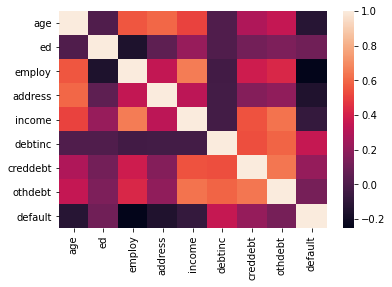

In [13]:
sns.heatmap(data.corr())

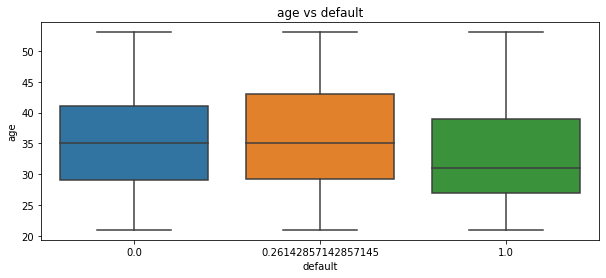

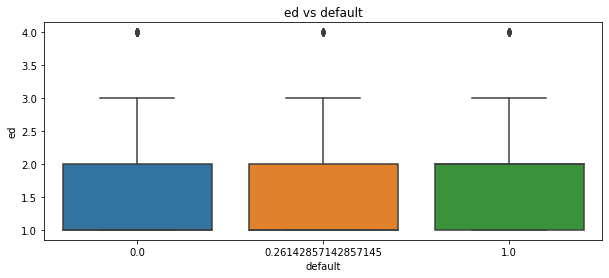

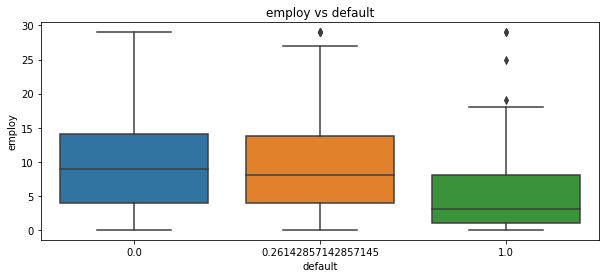

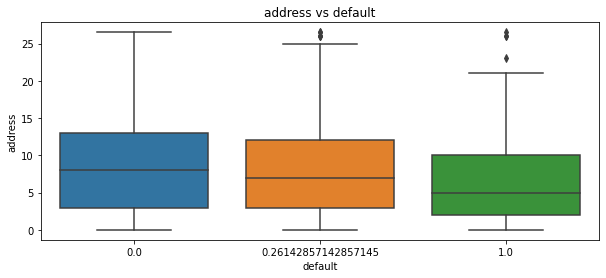

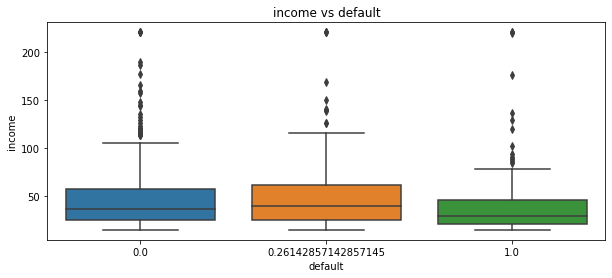

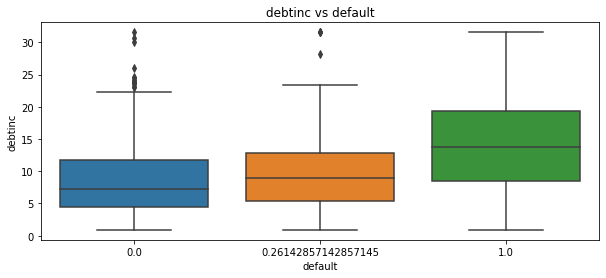

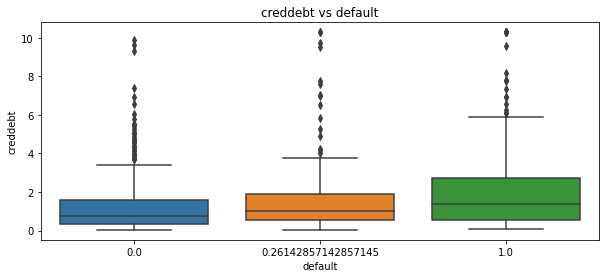

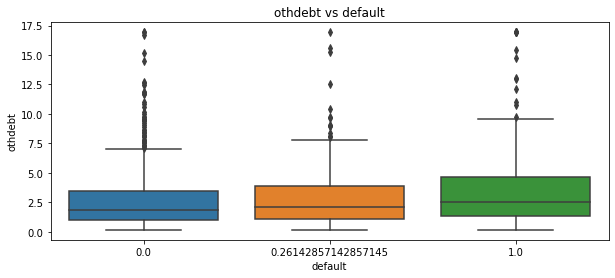

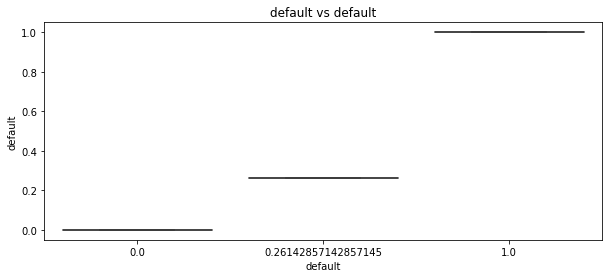

In [14]:
for col in data:
    
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=col, data=data).set(title="%s vs default"%col)
    
    

**From the above plots we know
Age - It depicts that people with lower age group tends to default more than with higher age group <br> 
creddebt - People with higher creddebt tends to default more. <br>
address - This depicts that people who are living at the same location for less time tends to default more.<br>
debtinc - People with higher debtinc ratio tends to default more.<br>
emply - This depicts that people who are employed more recently tends to default more.<br>
<br>
The above Interpretation confirms with the basic assumptions made in the Data set**

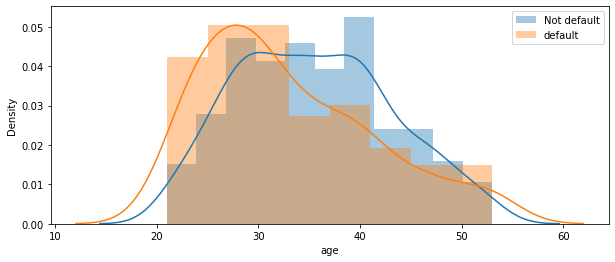

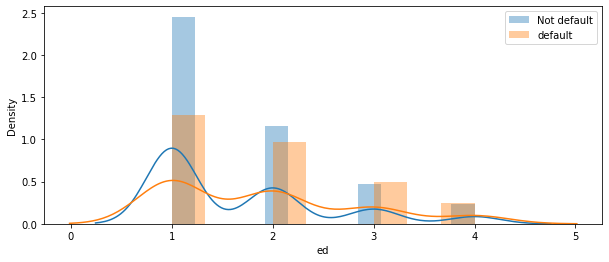

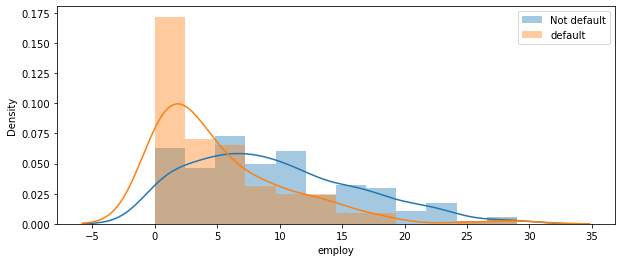

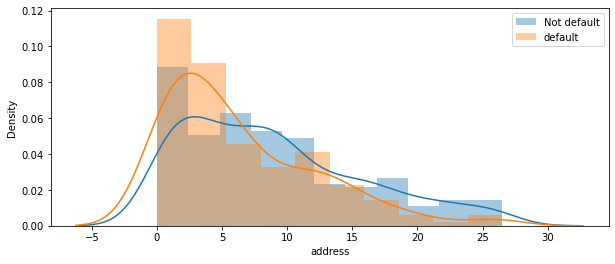

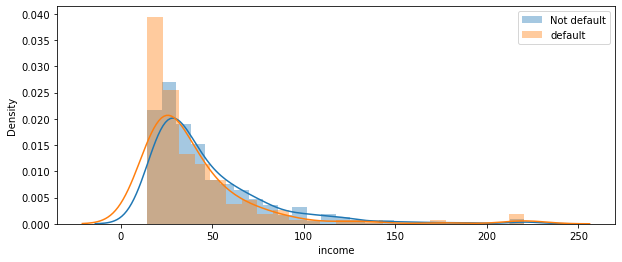

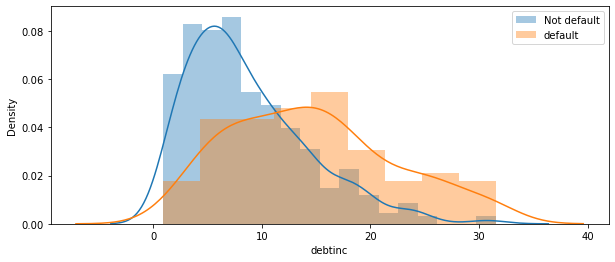

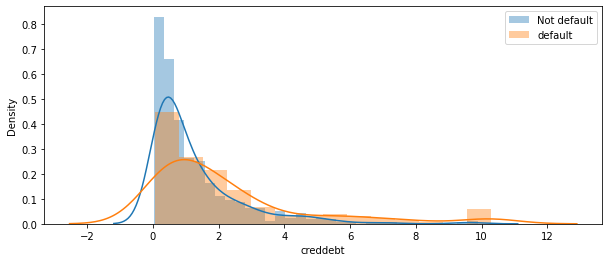

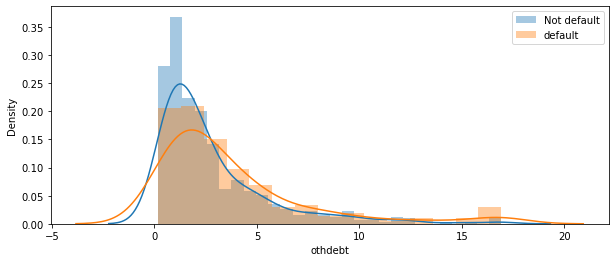

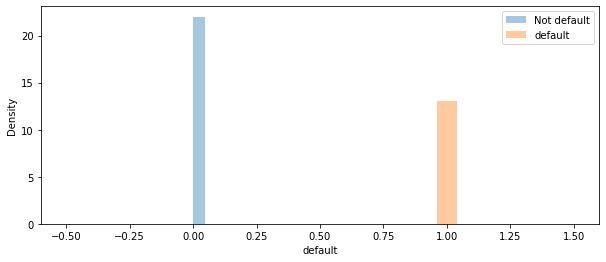

In [15]:
## Understanding Distribution

for col in data:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.distplot(data.loc[data['default']==0][col], label='Not default')
    sns.distplot(data.loc[data['default']==1][col], label='default')
    plt.legend()
    
    

## Devlop Machine Learning Models for Prediction

In [32]:
Results = []

In [23]:
data['default']=data['default'].apply(lambda x: int(x))

### Logistic regression

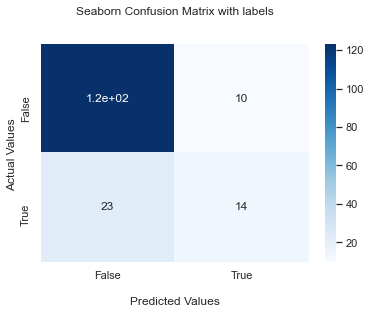

Accuracy = 80.588235 


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train_features = data.columns.difference(['default'])
train_sk_X,test_sk_X, train_sk_Y ,test_sk_Y = train_test_split(data[train_features],data['default'], test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(train_sk_X, train_sk_Y)

y_pred = logreg.predict(test_sk_X)
accuracy = metrics.accuracy_score(y_pred =  y_pred, y_true=test_sk_Y)*100


list = ['Logistic regression',accuracy]
Results.append(list)


#Confusion matrix plot 
CM = metrics.confusion_matrix(y_pred = y_pred, y_true = test_sk_Y)
ax = sns.heatmap(CM, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("Accuracy = %f "%accuracy)


## Decision Tree Classifier

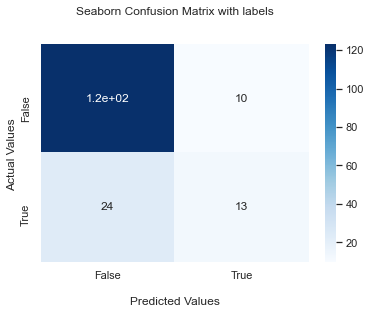

Accuracy = 80.000000 


In [34]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=10, max_depth=4)
dec_tree = dec_tree.fit(train_sk_X, train_sk_Y)
y_pred = dec_tree.predict(test_sk_X)
accuracy= metrics.accuracy_score(y_pred =  y_pred, y_true=test_sk_Y)*100

list = ['Decision Tree',accuracy]
Results.append(list)

CM = metrics.confusion_matrix(y_pred = y_pred, y_true = test_sk_Y)
ax = sns.heatmap(CM, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("Accuracy = %f "%accuracy)



## Naive Bayes Classifier


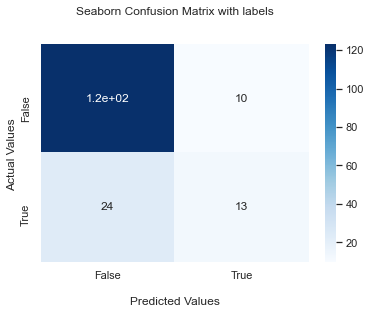

Recall = 80.000000 


In [35]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(train_sk_X, train_sk_Y)
pred_y=NBC.predict(test_sk_X)
accuracy= metrics.accuracy_score(y_pred =  y_pred, y_true=test_sk_Y)*100

list = ['Naive Bayes Classifier',accuracy]
Results.append(list)

#Confusion matrix plot 
CM = metrics.confusion_matrix(y_pred = y_pred, y_true = test_sk_Y)
ax = sns.heatmap(CM, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("Recall = %f "%accuracy)

The model with highest score is Logistic regression with a score of 80.59


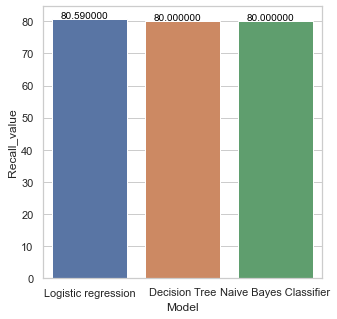

In [36]:
Df = pd.DataFrame(Results, columns=['Model', 'Recall_value']).sort_values(by='Recall_value',ascending=False)
pref_model = Df.loc[0][0]
score = round(Df.loc[0][1],2)
print("The model with highest score is %s with a score of %s"%(pref_model, score))

f, ax = plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
graph = sns.barplot(x='Model', y='Recall_value', data=Df)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2 + 0.2, p.get_height()+1, '%f' %round(p.get_height(),2),fontsize=10,color='black', ha='right', va='center')
plt.show()
